In [ ]:
import pandas as pd
df = pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
No,73.463013
Yes,26.536987


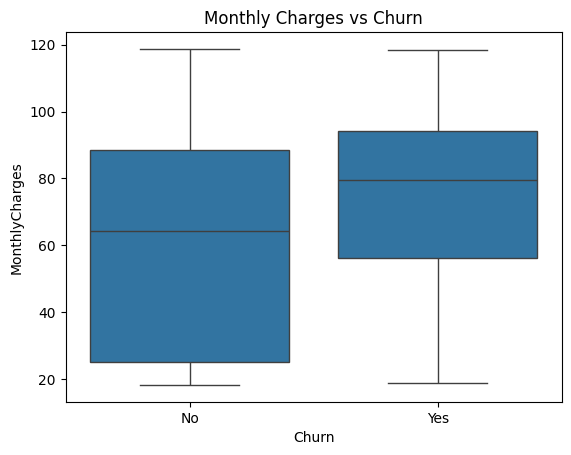

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

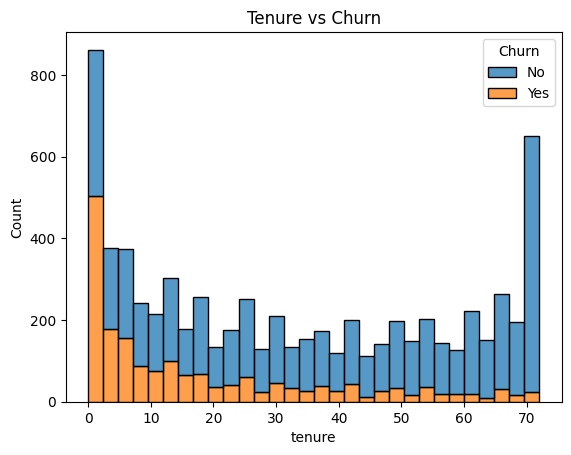

In [ ]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure vs Churn')
plt.show()

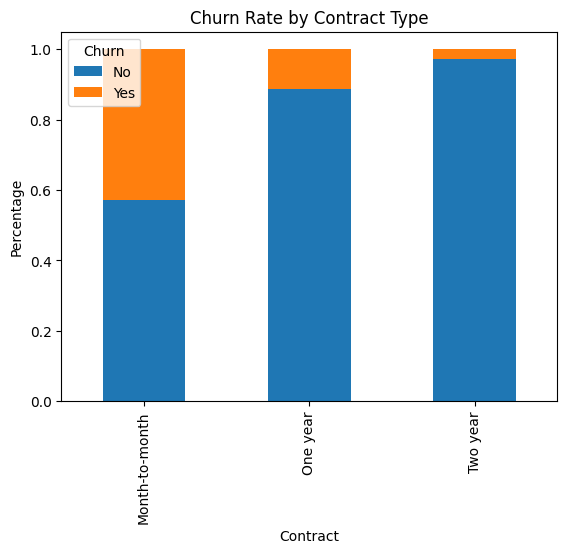

In [ ]:
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Percentage')
plt.show()

In [ ]:
df.drop('customerID', axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Make sure this is run before pd.get_dummies
if 'TotalCharges' in df.columns:
	df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
	df.dropna(inplace=True)
else:
	print("'TotalCharges' column not found. Make sure to run this before pd.get_dummies.")

'TotalCharges' column not found. Make sure to run this before pd.get_dummies.


In [ ]:
# Use the correct churn column after get_dummies
churn_col = 'Churn_Yes'
if churn_col not in df.columns:
	raise ValueError(f"Column '{churn_col}' not found in dataframe columns: {df.columns.tolist()}")
x = df.drop(churn_col, axis=1)
y = df[churn_col]

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df_encoded.drop('Churn_Yes', axis=1)  # if 'Churn' got split into Churn_Yes
y = df_encoded['Churn_Yes']

In [ ]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [ ]:
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8239886444286728
Confusion Matrix:
 [[939  97]
 [151 222]]
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.91      0.88      1036
        True       0.70      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



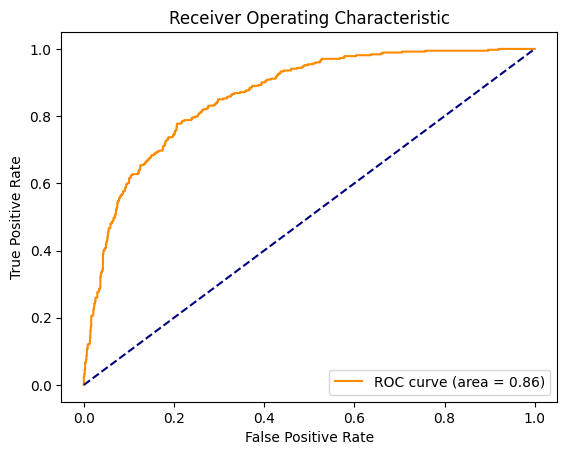

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
%pip install scikit-learn imbalanced-learn

In [ ]:
!pip install imbalanced-learn

In [ ]:
%pip install -U scikit-learn imbalanced-learn

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8062455642299503
Confusion Matrix:
 [[896 140]
 [133 240]]
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.86      0.87      1036
        True       0.63      0.64      0.64       373

    accuracy                           0.81      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.85      0.87      0.86      1036
        True       0.61      0.57      0.59       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]
y_pred_custom = (y_proba > 0.5).astype(int)
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

       False       0.87      0.86      0.87      1036
        True       0.63      0.64      0.64       373

    accuracy                           0.81      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.81      0.81      0.81      1409

